In [2]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from jy_strategy import Strategy,SMA,MACD,Param,Kalman,HP,Linear_Model
from matplotlib import pylab
from jy_center import Center_Param, Center

In [1]:
%matplotlib inline
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10, 6)

# MACD策略
移动平均线也是一个非常常用的平滑滤波的方法，人们喜欢利用移动平均线分析趋势。

人们认为长期的移动平均线于短时间的交线意味着上涨和下跌。

当长期的SMA穿过短时间的SMA时，意味着下跌。当短时间的SMA穿过长时间的SMA时则意味上上涨


In [3]:
C_param = Center_Param()# 初始化参数
C_param.start_date='2010-01-01'
C_param.end_date = '2015-12-30'
C = Center(C_param)   # 实例化交易中心变量

df = pd.read_csv("600005.XSHG.csv") #导入测试数据

60
real date:2009-12-31
money:2315535.0299999993
cangwei:0
roi:1.3155350299999993
alpha:-1.18881428577
beta:2.35380187761
algorithem volatility: 8.251657508
bench volatility: 3.09860878171
sharpe ratio: 0.136019244402
max drawdown: 0.41608866167463787
win ratio:0.23512544802867383
transfer times:16
1395


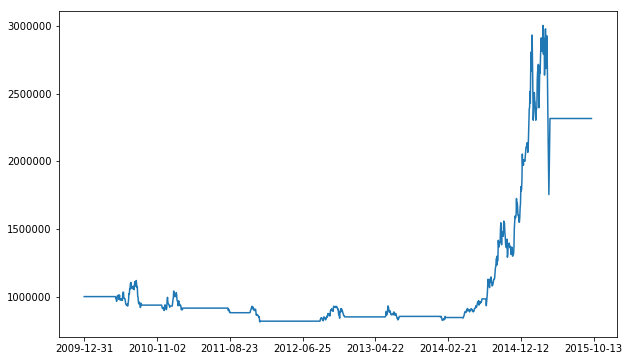

In [4]:
p=Param([60,20],5,5)
C.choose_strategy(MACD("a", df,p))
C.run_test()
C.print_result()

_, ax = pylab.subplots()
ax.plot(C.money_on)
ticks = ax.get_xticks()
ticks = ticks[ticks<len(C.current_strategy.his_ts)] 
ax.set_xticklabels([C.current_strategy.his_time[int(i)] for i in ticks[:]]) # Label x-axis with dates
print(len(C.money_on))

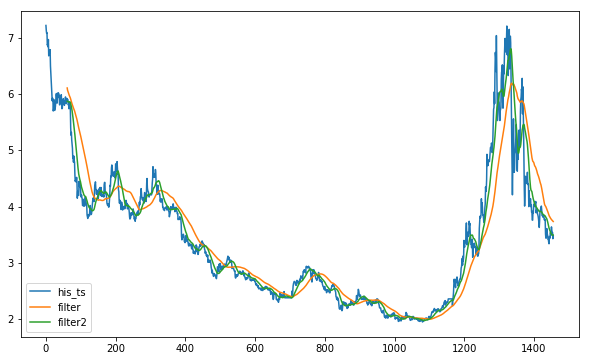

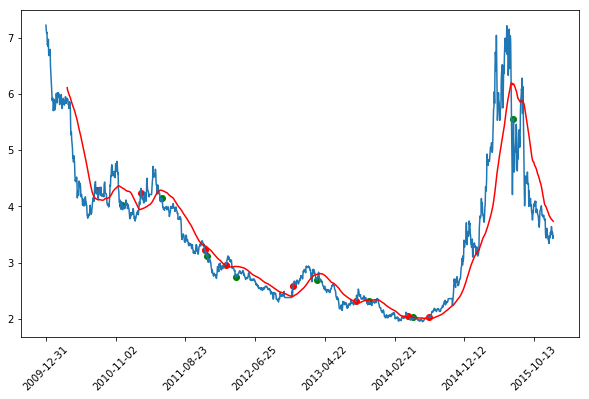

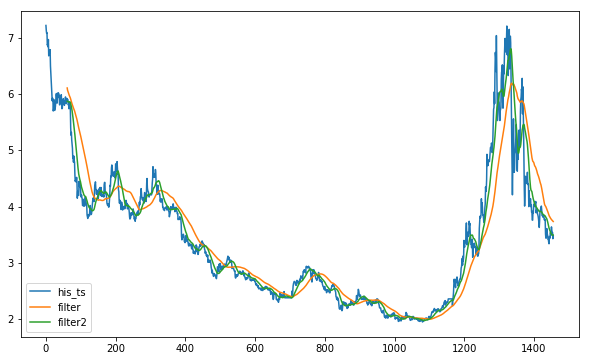

In [5]:
C.print_trade_log_pic()
C.print_plot_filter()

20
real date:2012-12-31


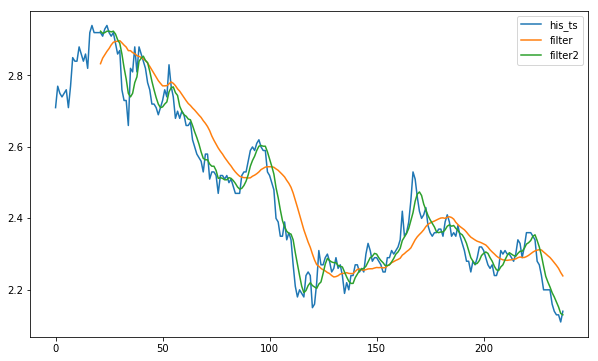

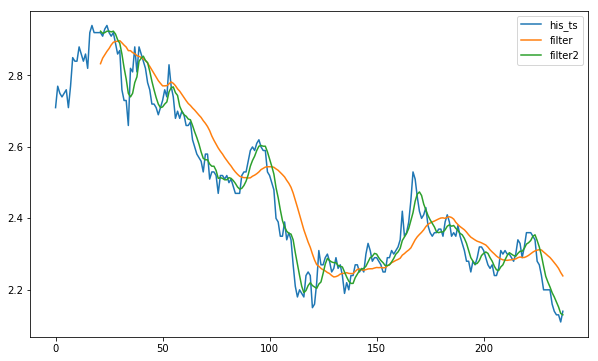

In [6]:
C_param = Center_Param()# 初始化参数
C_param.start_date='2013-01-01'
C_param.end_date = '2013-12-30'
C = Center(C_param)   # 实例化交易中心变量
p=Param([20,5],5,5)
C.choose_strategy(MACD("a", df,p))
C.run_test()
df = pd.read_csv("600005.XSHG.csv") #导入测试数据

C.print_plot_filter()


问题在于两者的交点太多，交易频繁，没有体现趋势

200
real date:2009-12-31
money:1642357.8199999998
cangwei:0
roi:0.6423578199999999
alpha:-0.743499803711
beta:1.82052221222
algorithem volatility: 6.612235956
bench volatility: 3.38164468896
sharpe ratio: 0.160895651282
max drawdown: 0.4160884606011945
win ratio:0.22231075697211156
transfer times:14
1255


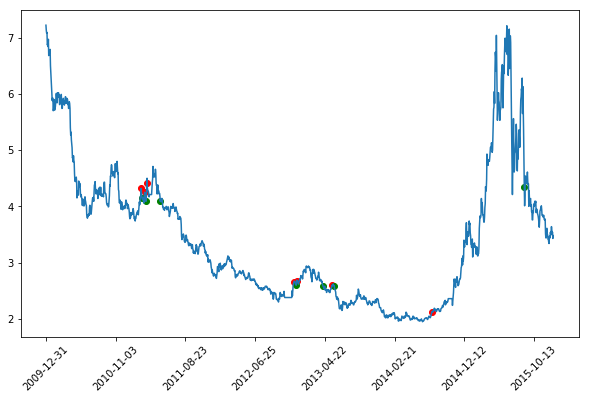

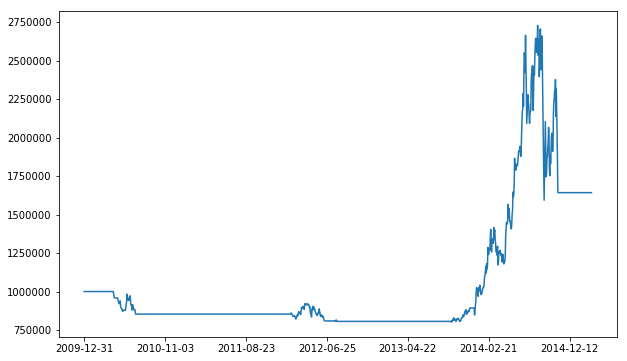

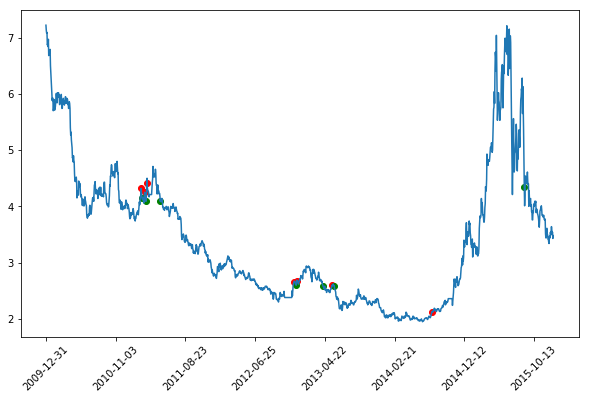

In [7]:
C_param = Center_Param()# 初始化参数
C_param.start_date='2010-01-01'
C_param.end_date = '2015-12-30'
C.param = C_param

p=Param([200,2],5,5)
C.choose_strategy(MACD("a", df,p))
C.run_test()
C.print_result()

_, ax = pylab.subplots()
ax.plot(C.money_on)
ticks = ax.get_xticks()
ticks = ticks[ticks<len(C.current_strategy.his_ts)] 
ax.set_xticklabels([C.current_strategy.his_time[int(i)] for i in ticks[:]]) # Label x-axis with dates
print(len(C.money_on))
C.print_trade_log_pic()

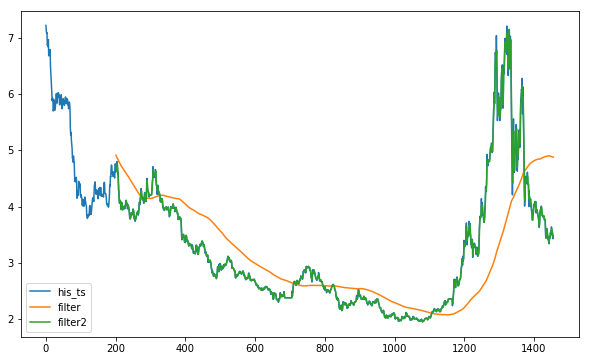

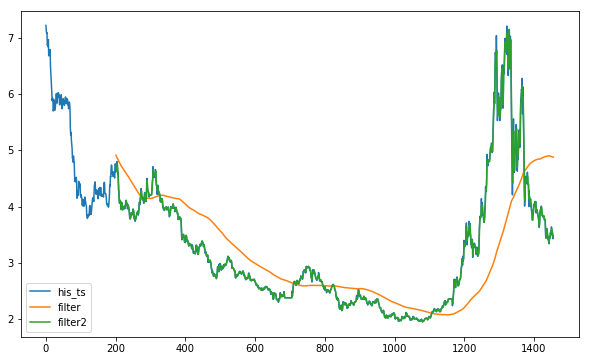

In [8]:
C.print_plot_filter()

60
real date:2009-12-31
money:2052171.2800000005
cangwei:0
roi:1.0521712800000005
alpha:-1.04370577589
beta:2.1806778724
algorithem volatility: 7.49492115104
bench volatility: 3.09860878171
sharpe ratio: 0.146432792806
max drawdown: 0.41608856833720625
win ratio:0.23512544802867383
transfer times:14
1395


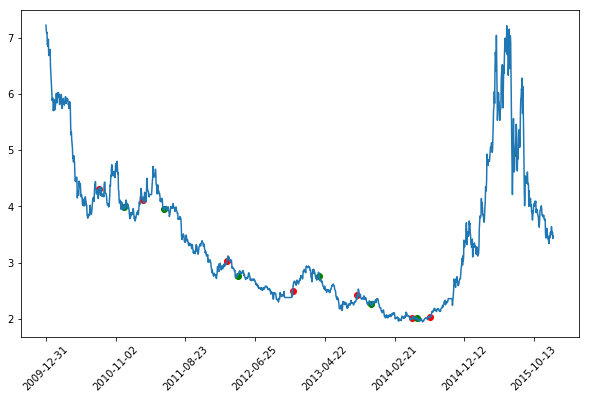

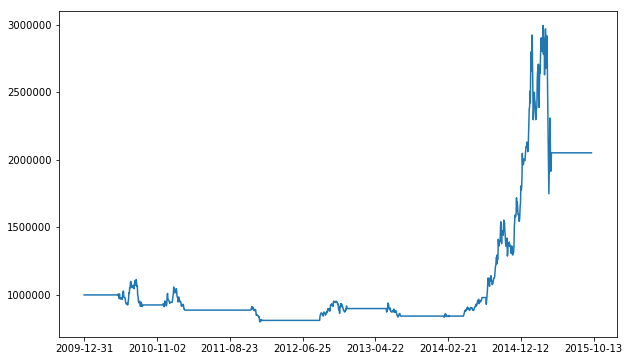

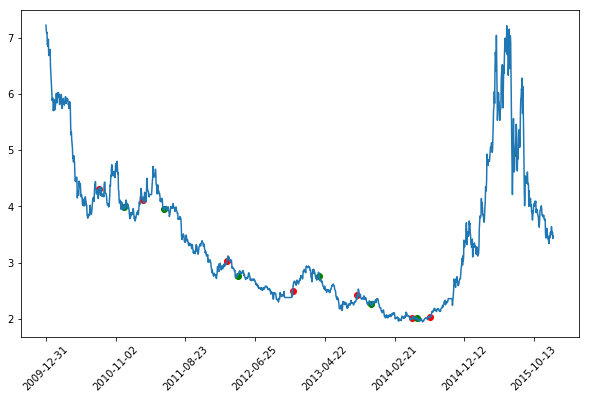

In [9]:
C_param = Center_Param()# 初始化参数
C_param.start_date='2010-01-01'
C_param.end_date = '2015-12-30'
C.param = C_param

p=Param([60,30],5,5)
C.choose_strategy(MACD("a", df,p))
C.run_test()
C.print_result()

_, ax = pylab.subplots()
ax.plot(C.money_on)
ticks = ax.get_xticks()
ticks = ticks[ticks<len(C.current_strategy.his_ts)] 
ax.set_xticklabels([C.current_strategy.his_time[int(i)] for i in ticks[:]]) # Label x-axis with dates
print(len(C.money_on))
C.print_trade_log_pic()

   name        time  price      tick  Signal  his_ts_index         trend
0    ss  2010-08-16   4.31  232018.0     1.0         152.0  6.333333e-04
1    ss  2010-12-06   3.99  232018.0    -1.0         224.0 -4.000000e-04
2    ss  2011-02-25   4.12  224697.0     1.0         277.0  3.333333e-05
3    ss  2011-05-27   3.95  224697.0    -1.0         339.0 -9.555556e-04
4    ss  2012-02-23   3.03  292922.0     1.0         519.0  2.333333e-04
5    ss  2012-04-11   2.77  292922.0    -1.0         550.0 -5.000000e-04
6    ss  2012-11-29   2.50  324558.0     1.0         708.0  1.184238e-16
7    ss  2013-03-26   2.77  324558.0    -1.0         783.0 -2.777778e-04
8    ss  2013-09-04   2.42  371498.0     1.0         891.0  1.555556e-04
9    ss  2013-11-08   2.27  371498.0    -1.0         931.0 -1.222222e-04
10   ss  2014-05-06   2.01  419553.0     1.0        1049.0  8.888889e-05
11   ss  2014-05-28   2.01  419553.0    -1.0        1065.0 -7.777778e-05
12   ss  2014-07-22   2.03  415419.0     1.0       

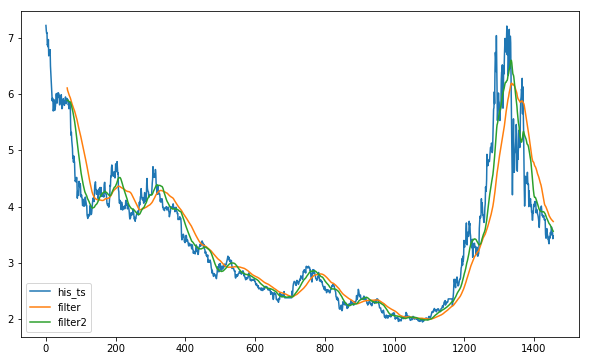

In [10]:
C.print_plot_filter()
print(C.trade_log)

real date:2009-12-31
real date:2012-01-20
money:2.389999999781139
cangwei:264410
roi:-0.21734401000000025
alpha:0.368343106503
beta:0.569161639561
algorithem volatility: 1.32091340429
bench volatility: 1.27664939939
sharpe ratio: 0.634063015016
max drawdown: 0.27192991106238606
win ratio:0.11727078891257996
transfer times:21
469


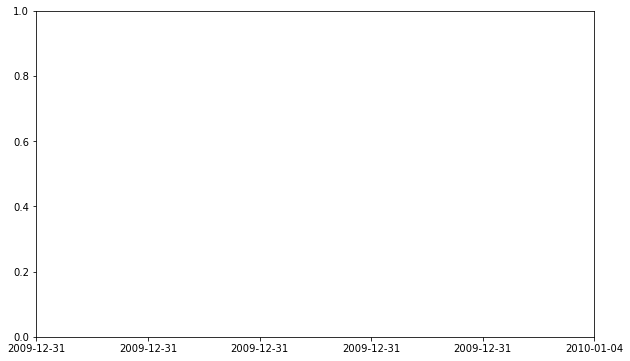

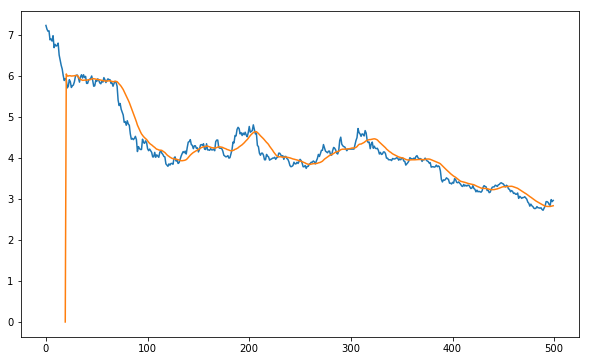

In [19]:
C_param = Center_Param()# 初始化参数
C_param.start_date='2010-01-01'
C_param.end_date = '2012-12-30'
C.param = C_param

p=Param([20],5,5)
C.choose_strategy(SMA("a", df,p))
C.run_test()
C.print_result()

_, ax = pylab.subplots()
#ax.plot(C.money_on)
ticks = ax.get_xticks()
ticks = ticks[ticks<len(C.current_strategy.his_ts)] 
ax.set_xticklabels([C.current_strategy.his_time[int(i)] for i in ticks[:]]) # Label x-axis with dates
print(len(C.money_on))
#C.print_trade_log_pic()
pylab.figure()
tmp = len(C.current_strategy.his_ts)-len(C.current_strategy.filter)
x1 = np.arange(len(C.current_strategy.his_ts))
x2 = np.arange(len(C.current_strategy.filter))+tmp
pylab.plot(x1,C.current_strategy.his_ts)
pylab.plot(x2,C.current_strategy.filter)